In [1]:
pip install pandas matplotlib seaborn numpy


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd


In [17]:
file_path = 'DataAnalysis.xlsx'  
data = pd.read_excel(file_path)
print(data.head())

   Unnamed: 0 Unnamed: 1           Unnamed: 2     Unnamed: 3 Unnamed: 4  \
0         NaN   Order ID                 Date        Product      Price   
1         NaN      10452  2022-11-07 00:00:00          Fries       3.49   
2         NaN      10453  2022-11-07 00:00:00      Beverages       2.95   
3         NaN      10454  2022-11-07 00:00:00  Sides & Other       4.99   
4         NaN      10455  2022-11-08 00:00:00        Burgers      12.99   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8     Unnamed: 9     Unnamed: 10  \
0   Quantity       Cost       City    Country  Purchase Type  Payment Method   
1        574       0.88        NaN        NaN        Online        Gift Card   
2        746       0.47        NaN        NaN        Online        Gift Card   
3        201       2.25        NaN        NaN      In-store        Gift Card   
4        570       4.32        NaN        NaN      In-store      Credit Card   

     Unnamed: 11 Unnamed: 12  
0        Manager     Revenue  
1    T

In [19]:
data = data.dropna(subset=['Unnamed: 1'])

data.columns = [
    'Index', 'Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Cost', 
    'City', 'Country', 'Purchase Type', 'Payment Method', 'Manager', 'Revenue'
]

data = data[1:]

data.reset_index(drop=True, inplace=True)

data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['Revenue'] = pd.to_numeric(data['Revenue'], errors='coerce')

print(data.head())


   Index Order ID                 Date             Product  Price  Quantity  \
0    NaN    10452  2022-11-07 00:00:00               Fries   3.49       574   
1    NaN    10453  2022-11-07 00:00:00           Beverages   2.95       746   
2    NaN    10454  2022-11-07 00:00:00       Sides & Other   4.99       201   
3    NaN    10455  2022-11-08 00:00:00             Burgers  12.99       570   
4    NaN    10456  2022-11-08 00:00:00  Chicken Sandwiches   9.95       202   

   Cost City Country Purchase Type Payment Method        Manager  Revenue  
0  0.88  NaN     NaN       Online       Gift Card    Tom Jackson  2003.26  
1  0.47  NaN     NaN       Online       Gift Card    Pablo Perez  2200.70  
2  2.25  NaN     NaN     In-store       Gift Card     Joao Silva  1002.99  
3  4.32  NaN     NaN     In-store     Credit Card  Walter Muller  7404.30  
4  2.85  NaN     NaN     In-store     Credit Card  Walter Muller  2009.90  


In [21]:
print(data.isnull().sum())


Index             254
Order ID            0
Date                0
Product             0
Price               0
Quantity            0
Cost                0
City              254
Country           254
Purchase Type       0
Payment Method      0
Manager             0
Revenue             0
dtype: int64


In [25]:
data['City'] = data['City'].fillna('Unknown')
data['Country'] = data['Country'].fillna('Unknown')

In [27]:
data.dropna(subset=['City', 'Country'], inplace=True)


In [29]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['Revenue'] = pd.to_numeric(data['Revenue'], errors='coerce')

In [31]:
data = pd.read_excel(file_path, header=1)


In [33]:
data.dropna(axis=1, how='all', inplace=True)

In [35]:
data.columns = data.columns.str.strip()

In [37]:
data.reset_index(drop=True, inplace=True)


In [39]:
print(data.head())

   Order ID       Date             Product  Price  Quantity  Cost  \
0     10452 2022-11-07               Fries   3.49       574  0.88   
1     10453 2022-11-07           Beverages   2.95       746  0.47   
2     10454 2022-11-07       Sides & Other   4.99       201  2.25   
3     10455 2022-11-08             Burgers  12.99       570  4.32   
4     10456 2022-11-08  Chicken Sandwiches   9.95       202  2.85   

  Purchase Type Payment Method        Manager  Revenue  
0       Online       Gift Card    Tom Jackson  2003.26  
1       Online       Gift Card    Pablo Perez  2200.70  
2     In-store       Gift Card     Joao Silva  1002.99  
3     In-store     Credit Card  Walter Muller  7404.30  
4     In-store     Credit Card  Walter Muller  2009.90  


In [41]:
product_revenue = data.groupby('Product')['Revenue'].sum()
print(product_revenue)

product_quantity = data.groupby('Product')['Quantity'].sum()
print(product_quantity)

Product
Beverages             123737.66
Burgers               385193.52
Chicken Sandwiches    115139.00
Fries                 125802.14
Sides & Other          52452.96
Name: Revenue, dtype: float64
Product
Beverages             34988
Burgers               29048
Chicken Sandwiches    11184
Fries                 32067
Sides & Other          9849
Name: Quantity, dtype: int64


In [43]:
summary_data = pd.DataFrame({
    'Revenue': [123737.66, 385193.52, 115139.00, 125802.14, 52452.96],
    'Quantity': [34988, 29048, 11184, 32067, 9849]
}, index=['Beverages', 'Burgers', 'Chicken Sandwiches', 'Fries', 'Sides & Other'])

print(summary_data)

                      Revenue  Quantity
Beverages           123737.66     34988
Burgers             385193.52     29048
Chicken Sandwiches  115139.00     11184
Fries               125802.14     32067
Sides & Other        52452.96      9849


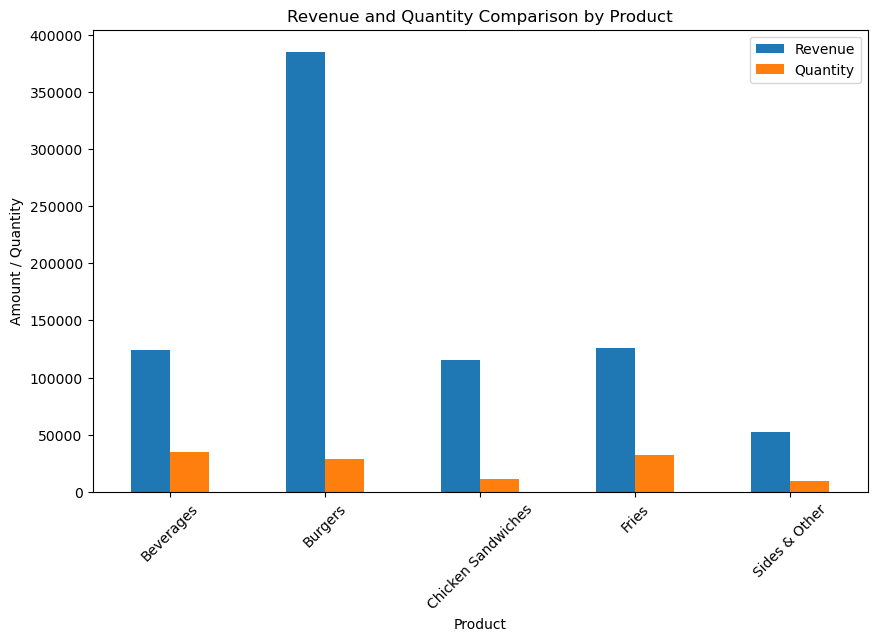

In [45]:
import matplotlib.pyplot as plt

summary_data.plot(kind='bar', figsize=(10,6))
plt.title('Revenue and Quantity Comparison by Product')
plt.ylabel('Amount / Quantity')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.show()

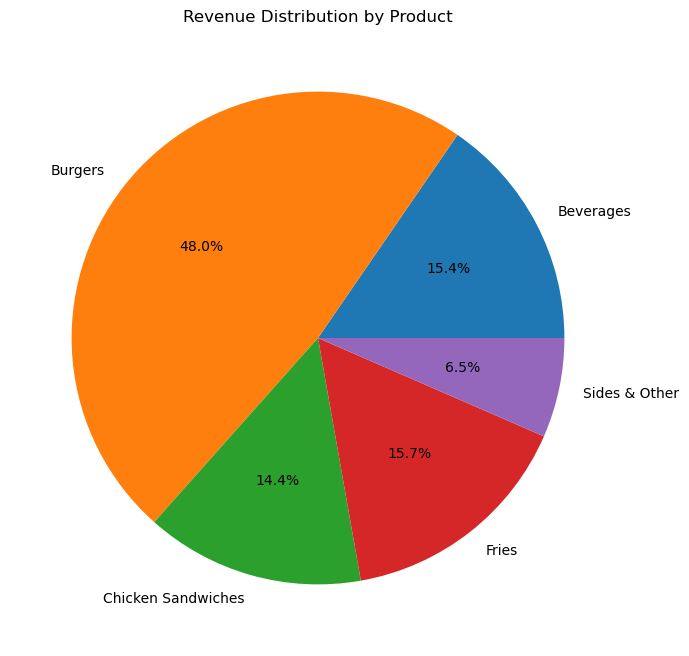

In [47]:
summary_data['Revenue'].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Revenue Distribution by Product')
plt.ylabel('')
plt.show()

In [49]:
summary_data['Revenue per Unit'] = summary_data['Revenue'] / summary_data['Quantity']
print(summary_data)

                      Revenue  Quantity  Revenue per Unit
Beverages           123737.66     34988          3.536574
Burgers             385193.52     29048         13.260587
Chicken Sandwiches  115139.00     11184         10.294975
Fries               125802.14     32067          3.923103
Sides & Other        52452.96      9849          5.325714


In [51]:
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Cost            254 non-null    float64       
 6   Purchase Type   254 non-null    object        
 7   Payment Method  254 non-null    object        
 8   Manager         254 non-null    object        
 9   Revenue         254 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.0+ KB


,Order ID,Date,Price,Quantity,Cost,Revenue
count,254.000000,254,254.000000,254.000000,254.000000,254.000000
mean,10584.133858,2022-12-03 10:23:37.322834688,7.345315,461.165354,2.171142,3158.760945
min,10452.000000,2022-11-07 00:00:00,2.950000,201.000000,0.470000,1002.990000
25%,10520.250000,2022-11-21 00:00:00,3.490000,202.000000,0.880000,2000.100000
50%,10583.500000,2022-12-03 00:00:00,4.990000,539.000000,2.250000,2200.700000
75%,10649.750000,2022-12-16 18:00:00,9.950000,678.000000,2.850000,2406.205000
max,10713.000000,2022-12-29 00:00:00,33.220000,755.000000,4.320000,22523.160000
std,75.889181,NaN,4.878813,214.691976,1.397481,2795.326745
